In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from time_rescale.simulate import (
    simulate_time, simulate_poisson_spikes, simulate_linear_distance, create_place_field)

Simulate a neuron that fires in a sinusodal pattern.

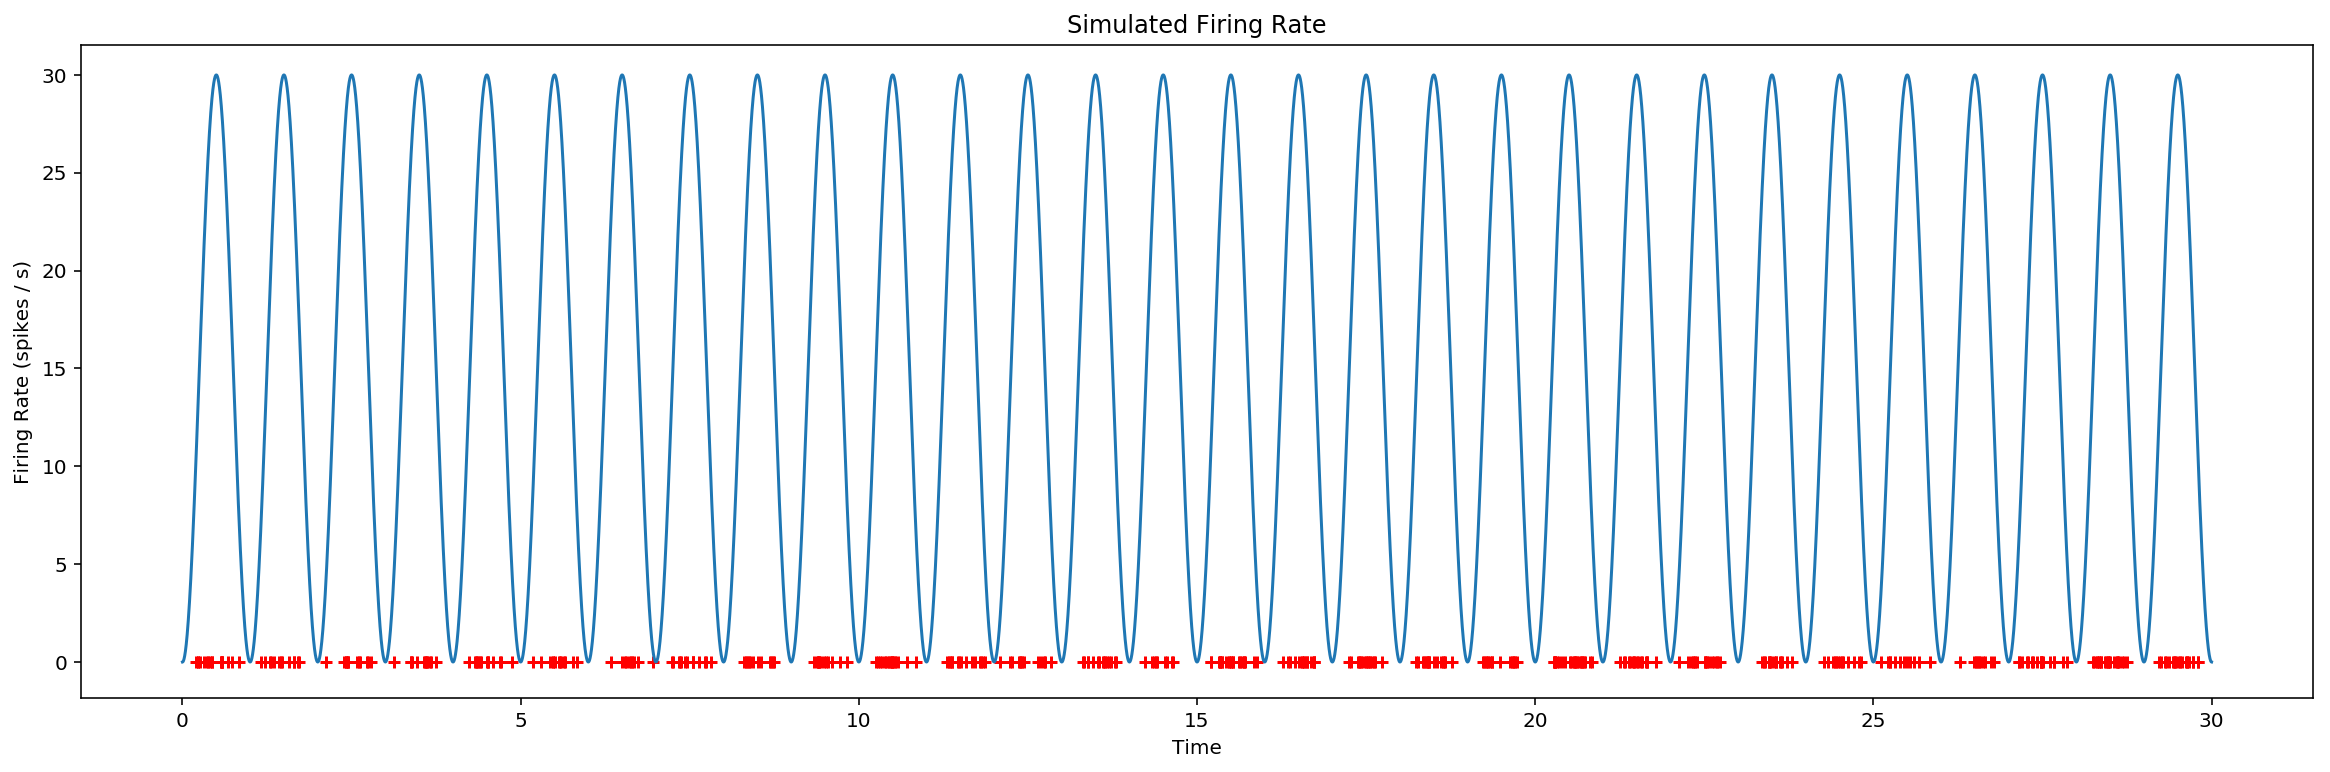

In [3]:
SAMPLING_FREQUENCY = 1500
n_samples = SAMPLING_FREQUENCY * 30

time = simulate_time(n_samples, SAMPLING_FREQUENCY)
max_firing_rate = 30
half_height = (max_firing_rate / 2)
firing_rate = half_height * np.cos(2 * np.pi * time) + half_height

spikes = simulate_poisson_spikes(firing_rate, SAMPLING_FREQUENCY)

fig, axes = plt.subplots(1, 1, figsize=(20, 6), sharex=True)
axes.plot(time, firing_rate)
axes.set_ylabel('Firing Rate (spikes / s)')
axes.set_title('Simulated Firing Rate');

spike_ind = np.nonzero(spikes)[0]
axes.scatter(time[spike_ind], np.zeros_like(spike_ind), marker='+', color='red');
axes.set_xlabel('Time')

Now we fit a model of this neuron that only has a constant firing rate.

/Users/edeno/miniconda3/envs/time_rescale/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


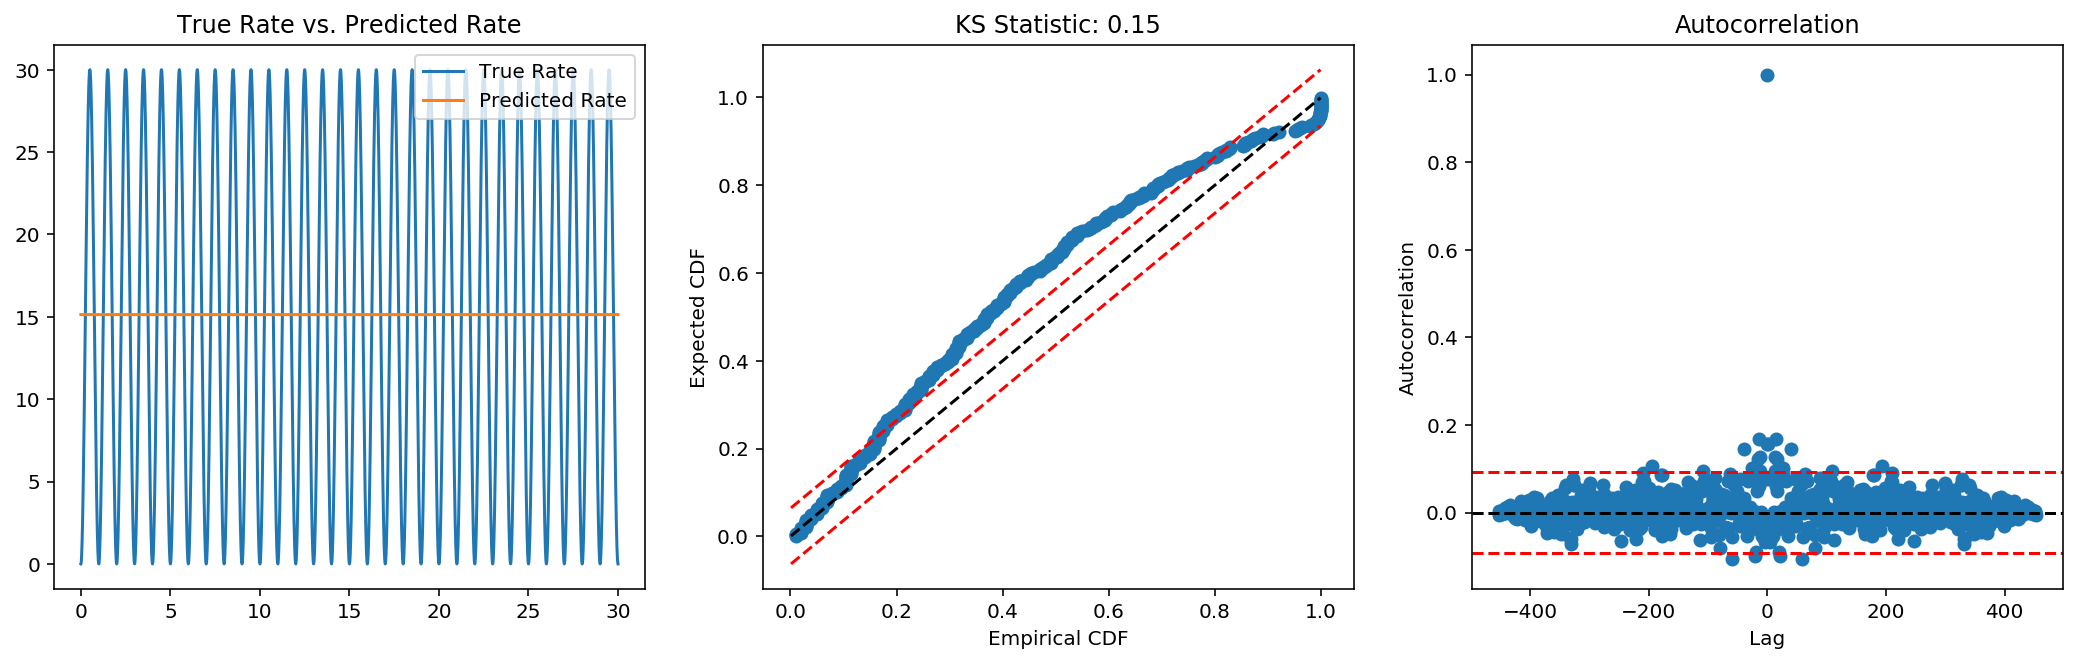

In [4]:
from patsy import build_design_matrices, dmatrix
from statsmodels.api import GLM, families
from time_rescale import TimeRescaling

n_time = time.shape[0]
design_matrix = np.ones((n_time, 1))

model = GLM(spikes, design_matrix, family=families.Poisson(),
            drop='missing')

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))


rescaled = TimeRescaling(conditional_intensity, spikes)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].plot(time, fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2])
axes[2].set_title('Autocorrelation');

Fit a model with a linear firing rate over time

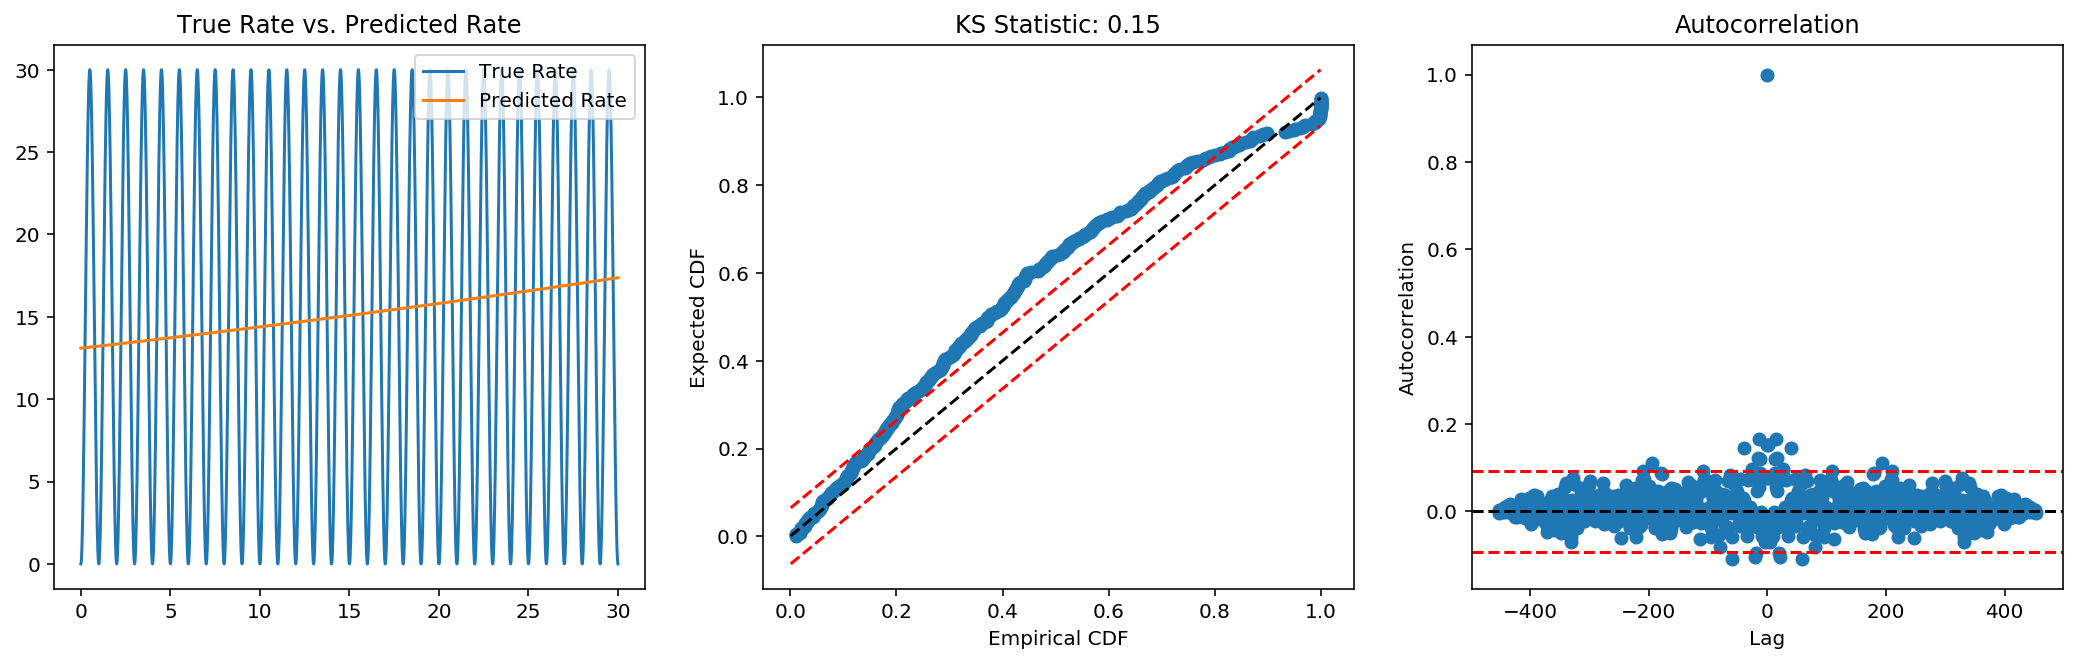

In [5]:
data = {'time': time}

formula = '1 + time'
design_matrix = dmatrix(formula, data)
model = GLM(spikes, design_matrix, family=families.Poisson())

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))


rescaled = TimeRescaling(conditional_intensity, spikes)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].plot(time, fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2])
axes[2].set_title('Autocorrelation');

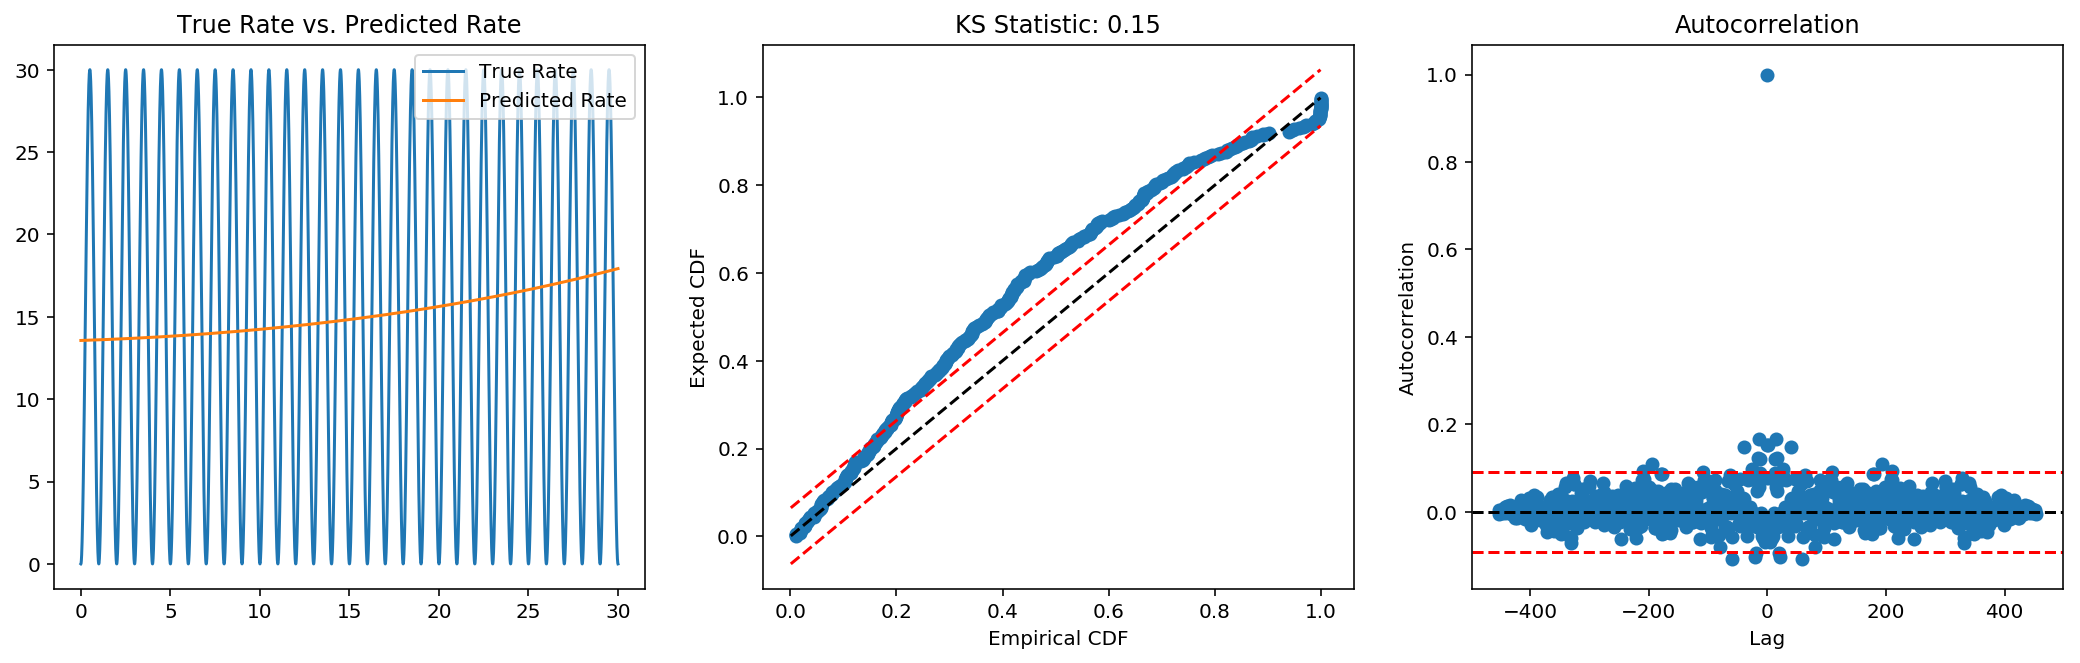

In [6]:
data = {'time': time}

formula = '1 + time + I(time ** 2)'
design_matrix = dmatrix(formula, data)
model = GLM(spikes, design_matrix, family=families.Poisson())

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))


rescaled = TimeRescaling(conditional_intensity, spikes)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].plot(time, fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2])
axes[2].set_title('Autocorrelation');

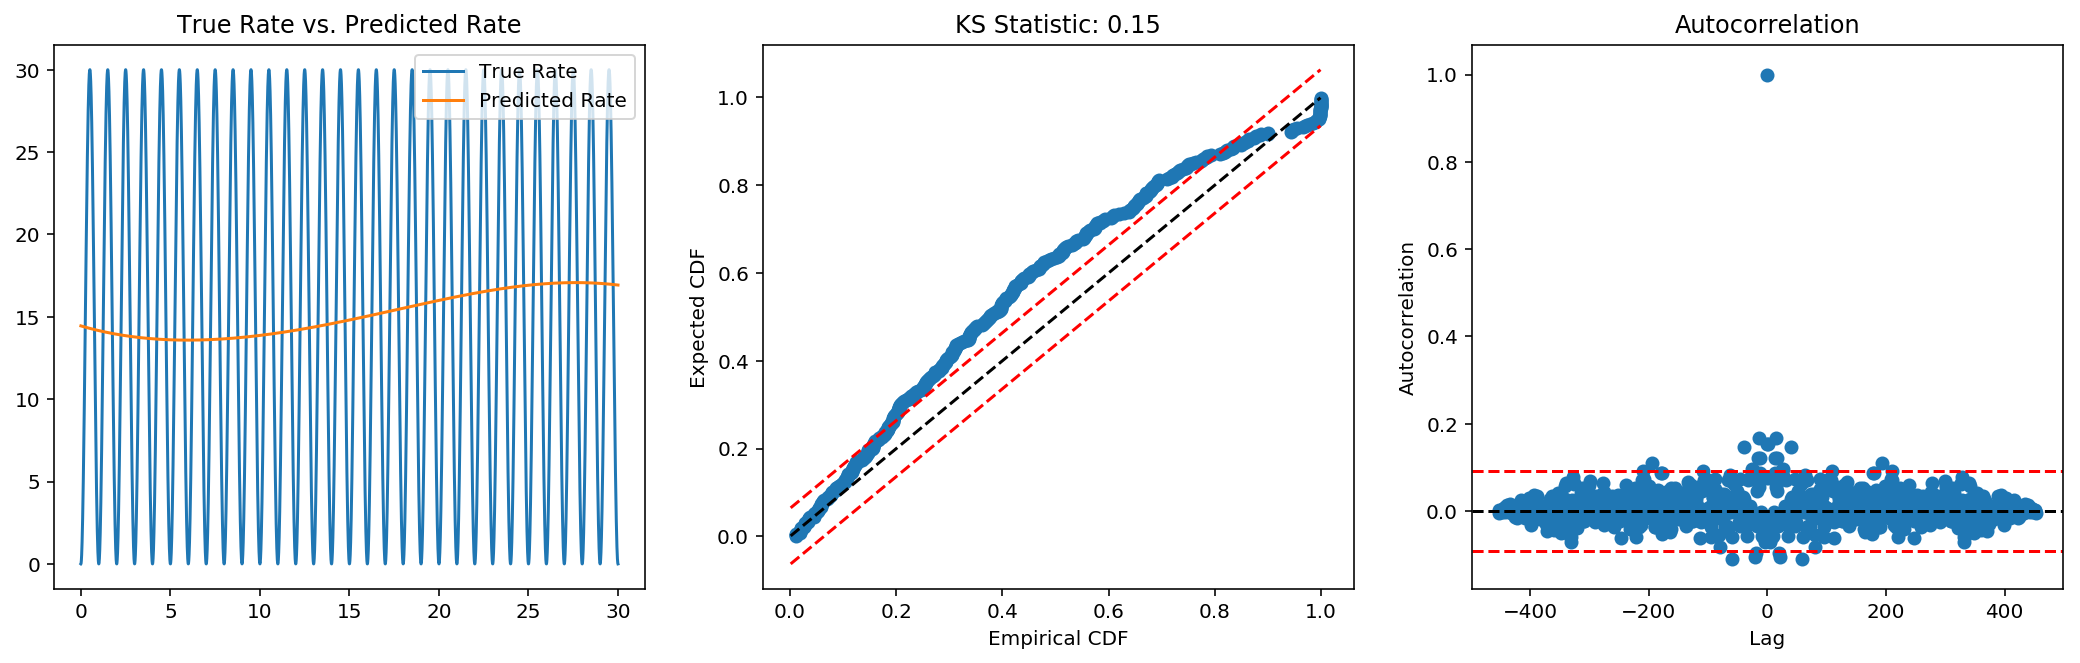

In [7]:
data = {'time': time}

formula = '1 + time + I(time ** 2) + + I(time ** 3)'
design_matrix = dmatrix(formula, data)
model = GLM(spikes, design_matrix, family=families.Poisson())

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))


rescaled = TimeRescaling(conditional_intensity, spikes)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].plot(time, fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2])
axes[2].set_title('Autocorrelation');

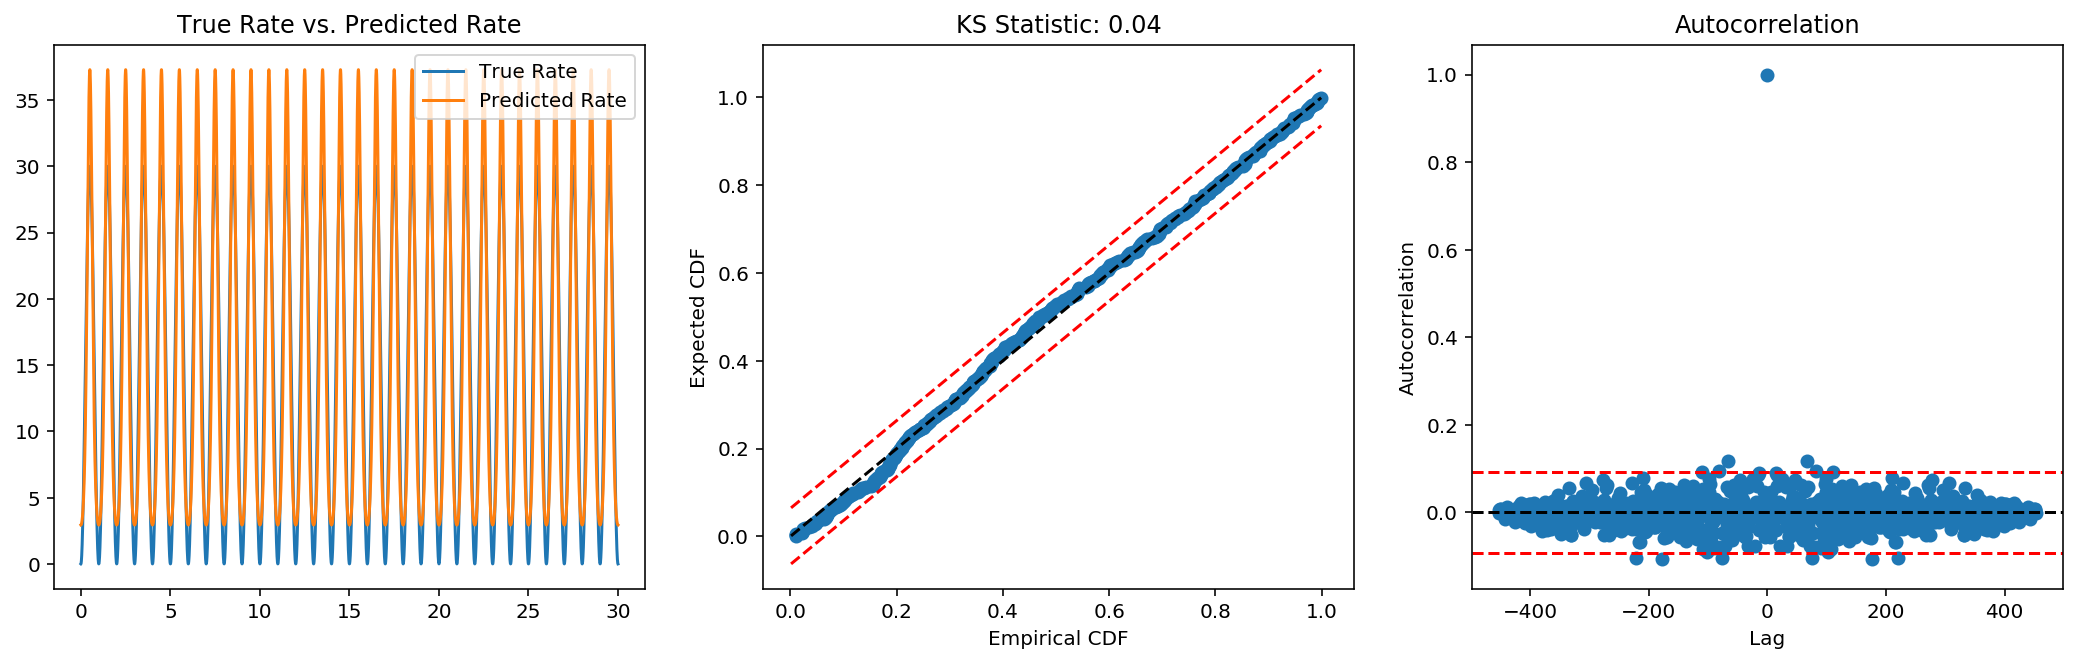

In [11]:
data = {'time': time}

formula = '1 + np.cos(2 * np.pi * time)'
design_matrix = dmatrix(formula, data)
model = GLM(spikes, design_matrix, family=families.Poisson())

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))


rescaled = TimeRescaling(conditional_intensity, spikes)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].plot(time, fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2])
axes[2].set_title('Autocorrelation');

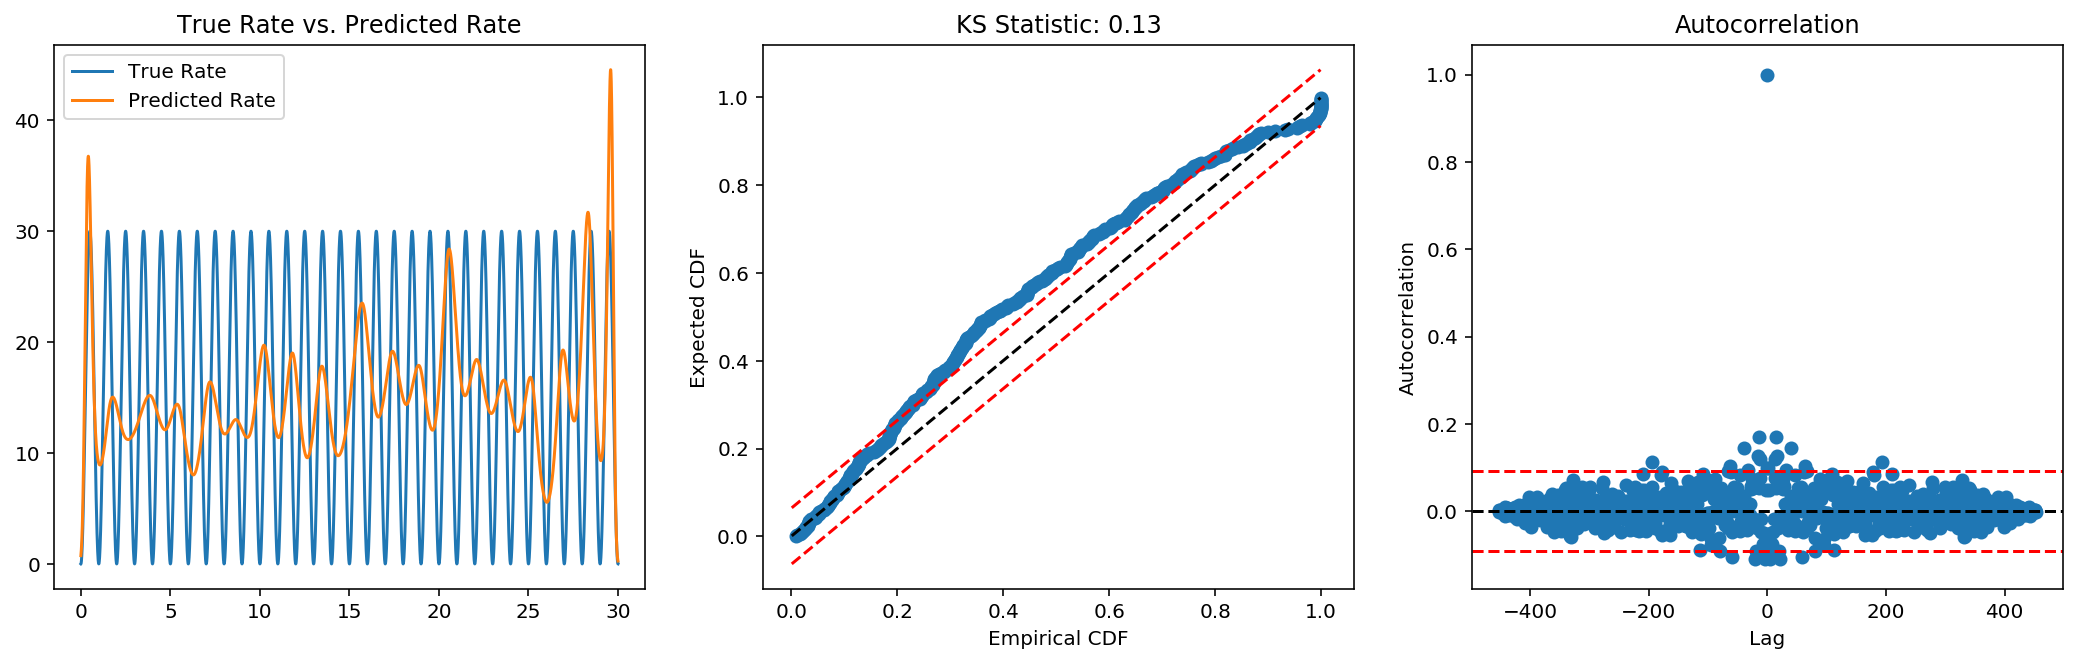

In [9]:
data = {'time': time}

formula = '1 + bs(time, df=40)'
design_matrix = dmatrix(formula, data)
model = GLM(spikes, design_matrix, family=families.Poisson())

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))


rescaled = TimeRescaling(conditional_intensity, spikes)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].plot(time, fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2])
axes[2].set_title('Autocorrelation');

## History Dependence

Simulate a neuron with a constant firing rate, but with a refractory period

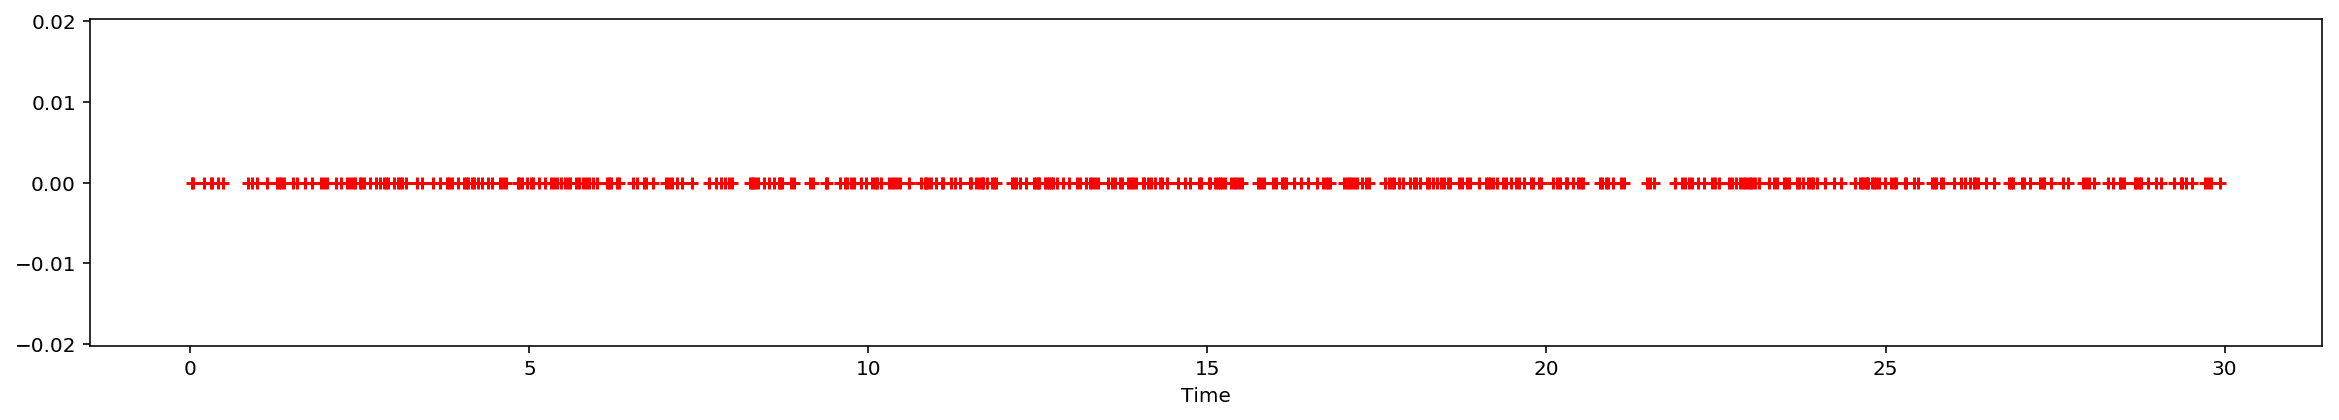

In [45]:
firing_rate = np.ones((n_time,)) * 20

spikes = simulate_poisson_spikes(firing_rate, SAMPLING_FREQUENCY)
spike_ind = np.nonzero(spikes)[0]
n_refactory_samples = np.ceil(SAMPLING_FREQUENCY * 0.020).astype(np.int)
refactory_ind = (spike_ind + np.arange(1, n_refactory_samples)[:, np.newaxis]).ravel()
refactory_ind = refactory_ind[refactory_ind < n_time]
spikes[refactory_ind] = 0

spike_ind = np.nonzero(spikes)[0]
plt.figure(figsize=(20, 3))
plt.scatter(time[spike_ind], np.zeros_like(spike_ind), marker='+', color='red');
plt.xlabel('Time');

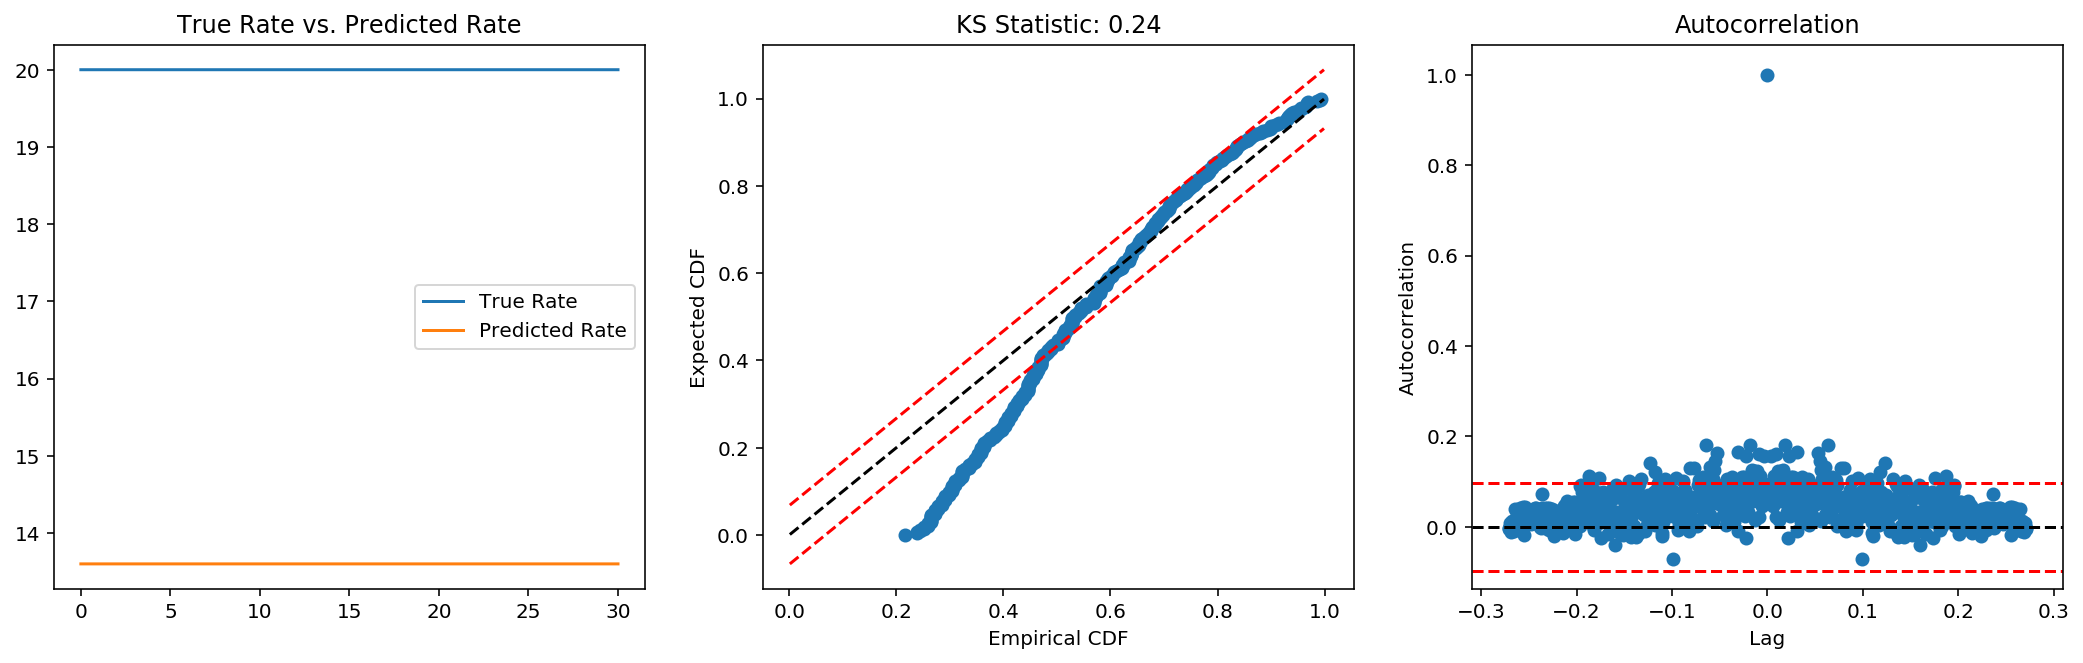

In [46]:
n_time = time.shape[0]
design_matrix = np.ones((n_time, 1))

model = GLM(spikes, design_matrix, family=families.Poisson(),
            drop='missing')

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))


rescaled = TimeRescaling(conditional_intensity, spikes)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].plot(time, fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2], sampling_frequency=SAMPLING_FREQUENCY)
axes[2].set_title('Autocorrelation');

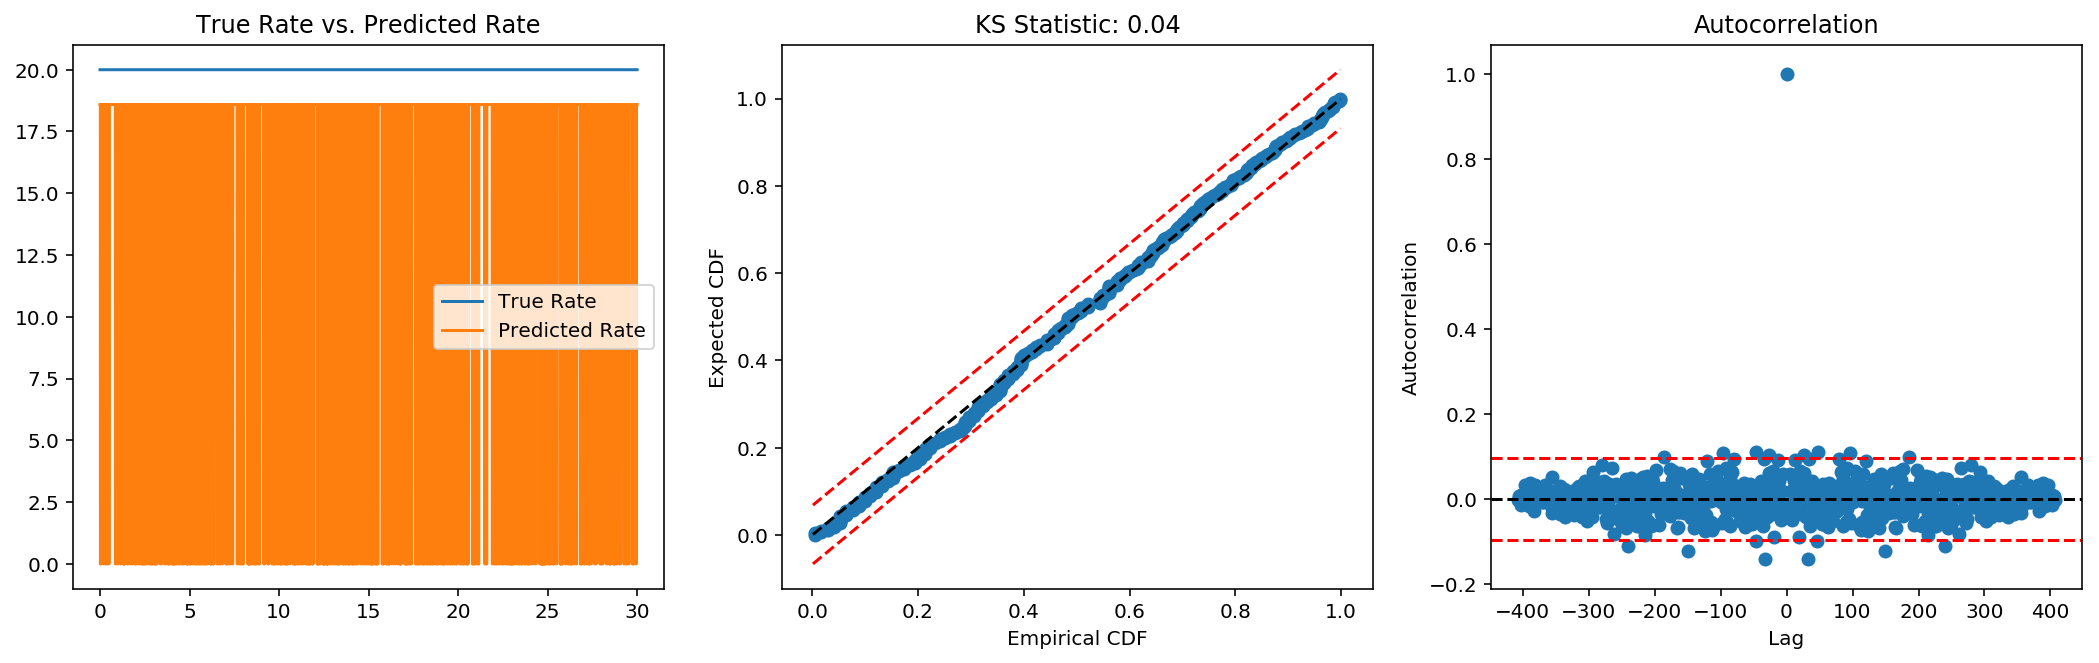

In [66]:
import pandas as pd

def lag(spikes, trial=None, n_lags=1, fillna_value=0.0):
    df = spikes if isinstance(spikes, pd.DataFrame) else pd.DataFrame(spikes)
    df = df.groupby(trial) if trial is not None else df
    return pd.concat([df.shift(lag).fillna(fillna_value)
                      for lag in np.arange(1, n_lags + 1)], axis=1)

data = {'spikes': spikes}

formula = '1 + lag(spikes, n_lags=n_refactory_samples)'
design_matrix = dmatrix(formula, data)
model = GLM(spikes, design_matrix, family=families.Poisson())

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))


rescaled = TimeRescaling(conditional_intensity, spikes)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].plot(time, fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2])
axes[2].set_title('Autocorrelation');

## Short Trials

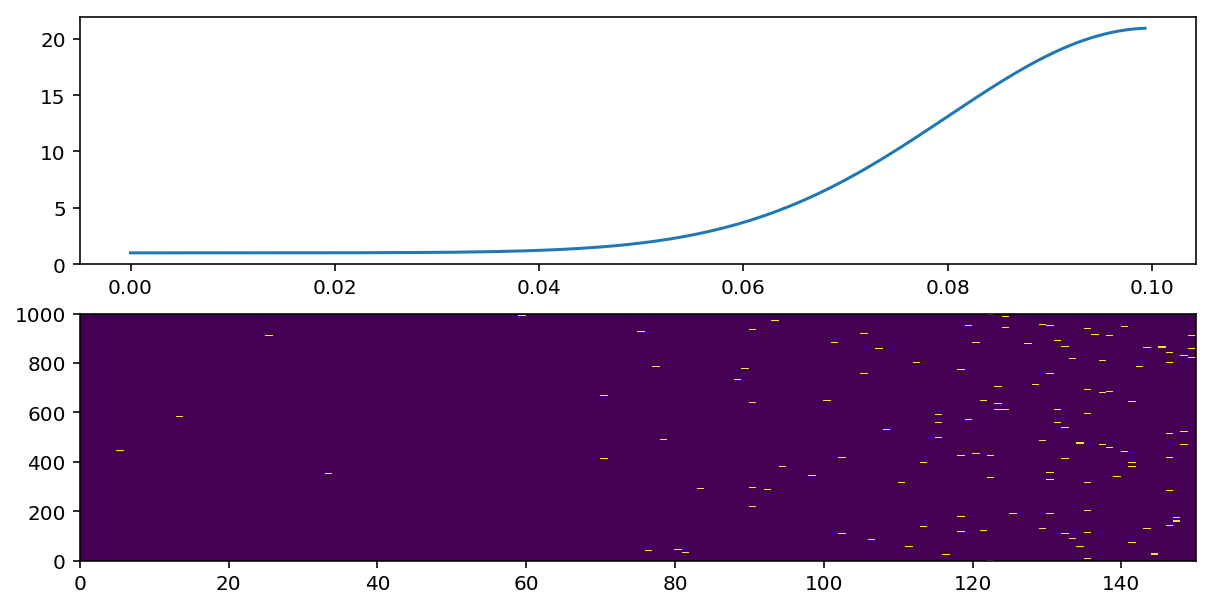

In [223]:
from scipy.stats import norm


SAMPLING_FREQUENCY = 1500
n_samples = SAMPLING_FREQUENCY * .100
n_trials = 1000

time = simulate_time(n_samples, SAMPLING_FREQUENCY)

firing_rate = norm(loc=0.100, scale=0.020).pdf(time) + 1

spikes = simulate_poisson_spikes(
    (firing_rate[:, np.newaxis] * np.ones((n_trials,))), SAMPLING_FREQUENCY)

trial_id = (np.ones_like(time) * np.arange(n_trials)[:, np.newaxis]).ravel()

fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].plot(time, firing_rate);
axes[1].pcolormesh(spikes.T);

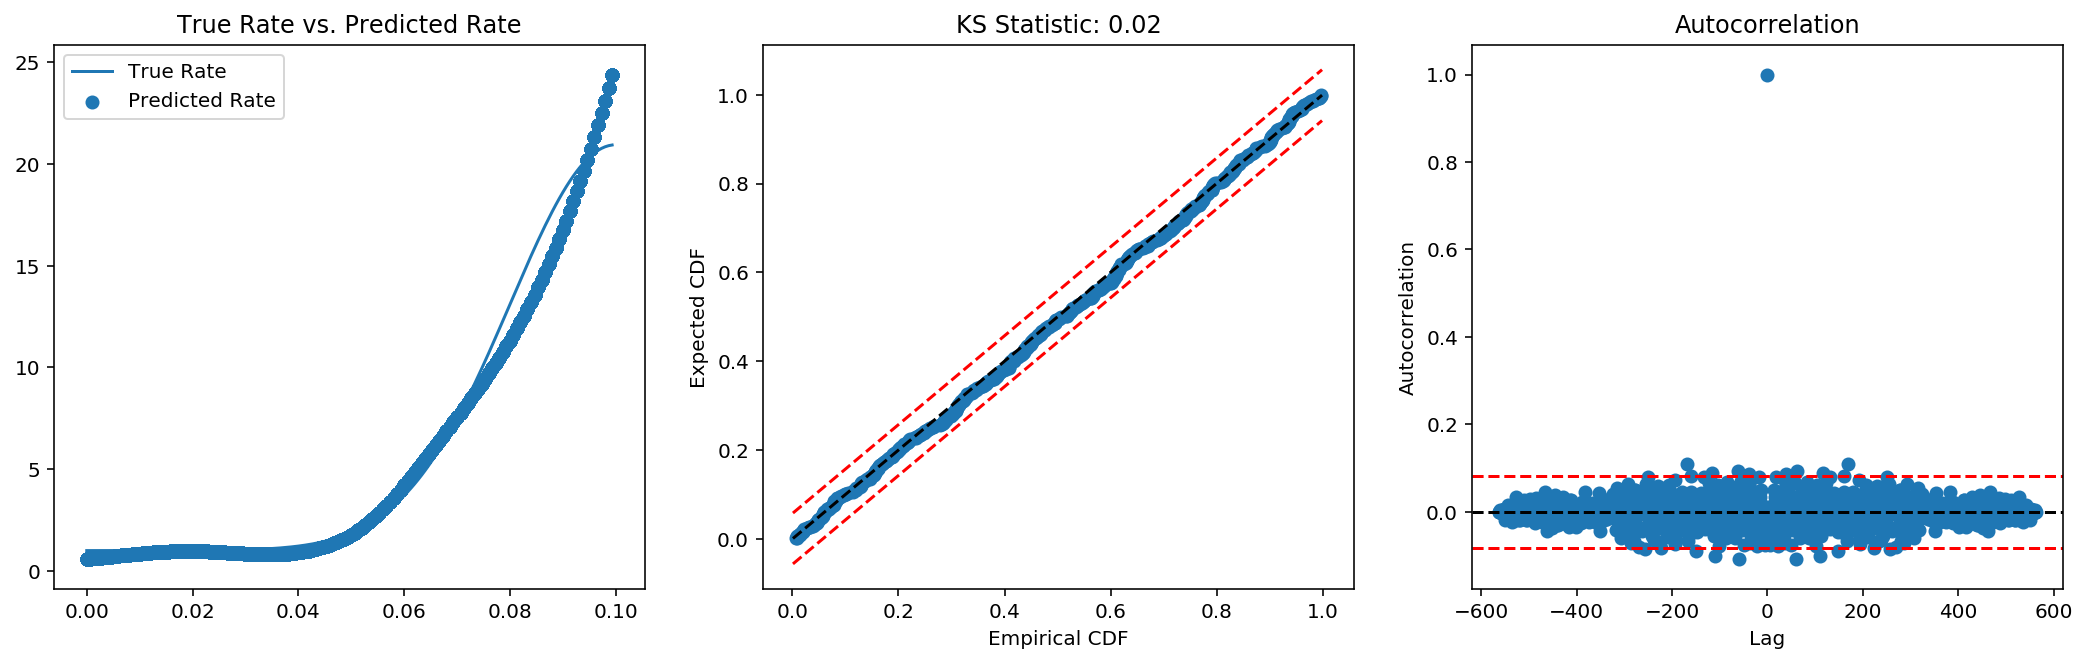

In [226]:
data = {'time': (time[:, np.newaxis] * np.ones((n_trials,))).ravel()}

formula = '1 + cr(time, df=5, constraints="center")'
design_matrix = dmatrix(formula, data)
model = GLM(spikes.ravel(), design_matrix, family=families.Poisson())

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))


rescaled = TimeRescaling(conditional_intensity, spikes.ravel())
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].scatter(data['time'], fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2])
axes[2].set_title('Autocorrelation');

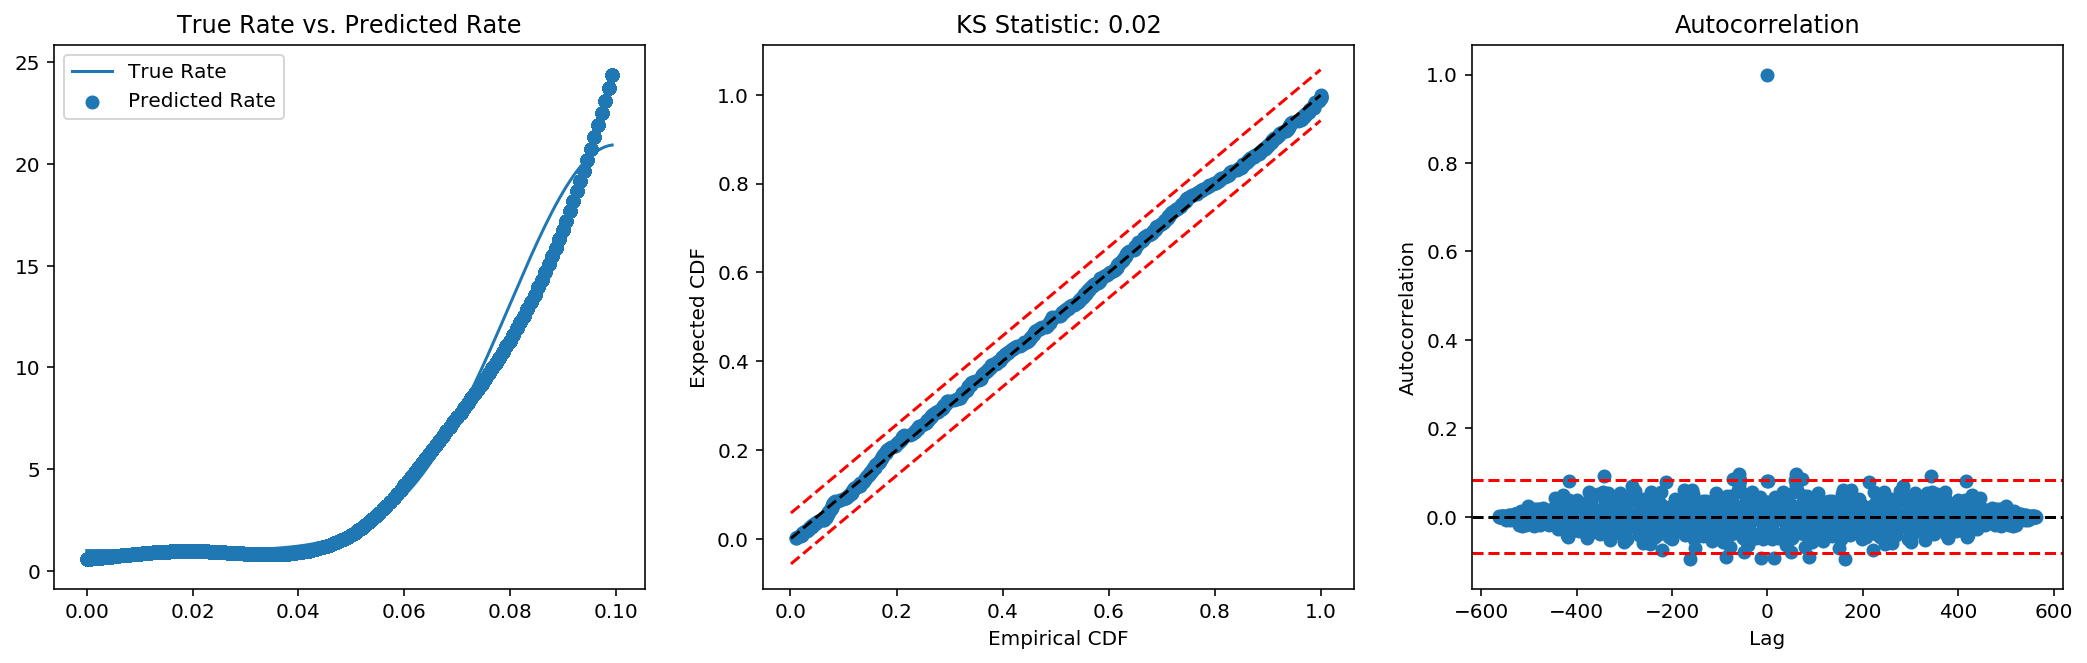

In [225]:
data = {'time': (time[:, np.newaxis] * np.ones((n_trials,))).ravel()}

formula = '1 + cr(time, df=5, constraints="center")'
design_matrix = dmatrix(formula, data)
model = GLM(spikes.ravel(), design_matrix, family=families.Poisson())

fit = model.fit()
conditional_intensity = np.exp(
        np.dot(design_matrix, fit.params))

rescaled = TimeRescaling(conditional_intensity, spikes.ravel(), trial_id=trial_id, adjust_for_short_trials=True)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(time, firing_rate, label='True Rate')
axes[0].scatter(data['time'], fit.predict() * SAMPLING_FREQUENCY, label='Predicted Rate');
axes[0].legend()
axes[0].set_title('True Rate vs. Predicted Rate')
rescaled.plot_ks(ax=axes[1])
axes[1].set_title('KS Statistic: {0:.2f}'.format(rescaled.ks_statistic()))
rescaled.plot_rescaled_ISI_autocorrelation(ax=axes[2])
axes[2].set_title('Autocorrelation');